### Introduction

_“F### off you anti-semitic c###”  
“She’s cute in an earthy kind of way. Can’t sing for sh## though”  
“F###### stupid a##. You have to apply for when when your 16 stupid f###”  
“Only a fool can believe such numbers. The correct answer lies between 10,000 to 15,000.”_  
  
It is unsurprising to see such comments above on the internet. Today, misleading and toxic comments abound. However, with the advances in machine learning, we can algorithmically:

- classify
- analyze
- ammend 

such comments to make the internet a better place one constructive comment at a time. We will start off with a kaggle dataset of Wikipedia commentst (https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge) to build our model


#### (Importing Libraries)

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import re, nltk, string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

#for supervised classifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

/home/xtzie/anaconda3/envs/metis/lib/python3.7/site-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/home/xtzie/anaconda3/envs/metis/lib/python3.7/site-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/home/xtzie/anaconda3/envs/metis/lib/python3.7/site-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/home/xtzie/anaconda3/envs/metis/lib/python3.7/site-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/home/xtzie/anaconda3/envs/metis/lib/python3.7/site-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is de

### Exploratory Data Analysis

Significant preprocessing and data cleaning required as we see: 

- Spelling and grammar errors
- The dataset includes moderator comments
- There are other languages apart from English

In [16]:
df = pd.read_csv('comments.csv')


#we also add a column for a comment that is toxic in general
df['placeholder'] = df['toxic'] + df['severe_toxic'] + df['obscene'] + df['threat'] + df['insult'] + df['identity_hate']
df['toxic_general'] = df['placeholder'].apply(lambda x: True if x > 0 else False)
df.drop(labels = ['placeholder'], inplace = True, axis = 1)

df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_general
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,False
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,False
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,False
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,False
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,False
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,False
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,True
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,False
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,False
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,False


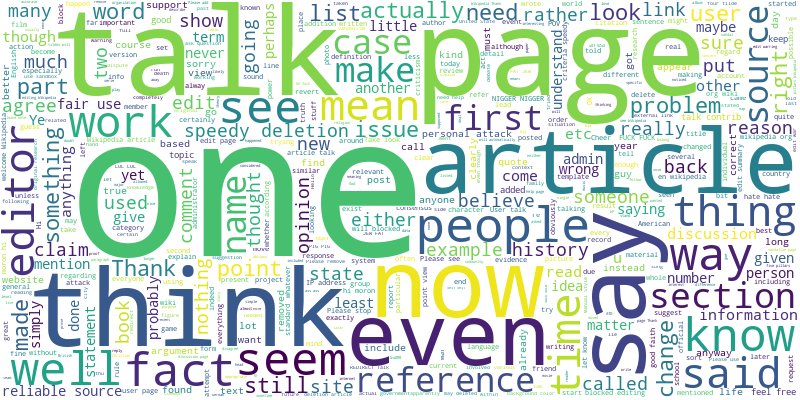

In [3]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(background_color="white", max_words=500, width = 800, height = 400,
                      contour_width=3, contour_color='steelblue', 
                      stopwords = STOPWORDS)

x = list(df['comment_text'])
longstring = ','.join(x)
wordcloud.generate(longstring)
wordcloud.to_image()


#### (view more comments)

In [4]:
viewnumber = 10
for index, x in enumerate(df['comment_text'][0:viewnumber]):
    print('COMMENT NUMBER', index, '\n',  x)

COMMENT NUMBER 0 
 Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
COMMENT NUMBER 1 
 D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
COMMENT NUMBER 2 
 Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
COMMENT NUMBER 3 
 "
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does fir